# Initial Conditions

In [ ]:
from google.colab import drive
drive.mount('/content/MyDrive')

Mounted at /content/MyDrive


In [ ]:
!pip install --upgrade plotly

     |████████████████████████████████| 25.3 MB 1.5 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [ ]:
import os
os.chdir('MyDrive/MyDrive/pp_dsci_scf')

In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px

In [ ]:
os.chdir('WORLDOFFICE')
os.listdir()

['2018_VENTAS.xlsx',
 '2019_VENTAS.xlsx',
 '2020_VENTAS.xlsx',
 'Listado_inventario.xlsx',
 '2018_compras_pedidos.xlsx',
 '2019_compras_pedidos.xlsx',
 '2020_compras_pedidos.xlsx',
 '2020_COMPRAS.xlsx',
 '2019_COMPRAS.xlsx',
 '2018_COMPRAS.xlsx',
 'ld_mayo_2020.xlsx',
 'ld_enero_2020.xlsx',
 'ld_febrero_2020.xlsx',
 'ld_marzo_2020.xlsx',
 'ld_abril_2020.xlsx',
 'ld_enero_2019.xlsx',
 'ld_febrero_2019.xlsx',
 'ld_marzo_2019.xlsx',
 'ld_abril_2019.xlsx',
 'ld_mayo_2019.xlsx',
 'ld_junio_2019.xlsx',
 'ld_julio_2019.xlsx',
 'ld_agosto_2019.xlsx',
 'ld_septiembre_2019.xlsx',
 'ld_octubre_2019.xlsx',
 'ld_noviembre_2019.xlsx',
 'ld_diciembre_2019.xlsx',
 'ld_junio_2020.xlsx',
 'ld_julio_2020.xlsx',
 'ld_agosto_2020.xlsx',
 'hoja_de_datos_b.xlsx',
 'hoja_de_datos.xlsx']

# I Data Load

=> complete_df['Descripcion',...mes_ventas...,'Descripcion_total','Descripcion_parcial','LINEA','MARCA']

### Limpieza de stopwords

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words_sp = set(stopwords.words('spanish'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def cleaning(stringofstrings):

  tmp_lista = []
  for word in stringofstrings:
    if word not in stop_words_sp:
      tmp_lista.append(word)
  return str(tmp_lista)

### Data Transforming

In [ ]:
def data_transforming(df,columns_list):

  for i in columns_list:

    df[i] = df[i].map(lambda x: re.sub(r'[^\w\s]','',str(x) )) #quita signos de puntuación
    df[i] = df[i].map(lambda x: x.rstrip().lower() ) #quita espacios al final
    df[i] = df[i].map(lambda x: x.rsplit() ) #tokeniza
    df[i] = df[i].map(lambda x: cleaning(x) ) # limpia, quita stopwords
    df[i] = df[i].map(lambda x: re.sub(r'[^\w\s]','',x )) # detokeniza

  return df

## Sales Files
Se usa la líbreria "re" para leer los archivos de ventas estrictamente necesarios<br>
* => ventas

In [ ]:
lista = os.listdir()
re_lista = []
for file_cosa in lista:
    objeto = re.search(r'VENTAS',file_cosa)
    if objeto:
        re_lista.append(file_cosa)
re_lista

['2018_VENTAS.xlsx', '2019_VENTAS.xlsx', '2020_VENTAS.xlsx']

In [ ]:
my_data = {}
for wo_file in re_lista:
    df_name = wo_file.replace(".xlsx","")
    my_data[df_name] = pd.read_excel(wo_file, skiprows=3, usecols="A:N", index_col=None).iloc[:-2,1:]

In [ ]:
my_data["2019_VENTAS"].sample()

,Descripción,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
1974,JW 92019 TG-4,0,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
my_data["2019_VENTAS"].iloc[:,:-1]

,Descripción,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre
0,.050101/02,0,0,2,0,0,1,4,0,0,1,0
1,004494,0,0,0,0,0,0,0,0,0,0,1
2,007325,1,0,0,1,0,1,0,0,0,0,0
3,010103,0,0,0,1,1,0,0,0,1,1,0
4,01052603 APC,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2266,YD-406,0,0,0,0,1,0,0,0,0,0,0
2267,YD-803,1,0,1,0,0,1,0,0,0,0,0
2268,YR-321EP,0,0,0,0,0,0,0,0,1,2,0
2269,YR-807,0,0,0,0,0,1,0,0,0,0,0


In [ ]:
ventas = pd.DataFrame(columns=['Descripcion'])
print(ventas)
for key,df_value in my_data.items():
    tmp_ventas = pd.DataFrame()
    #print(tmp_ventas)
    year = key[:5]
    print(key[:5])
    year = year.replace("_"," - ")
    print(year)
    df_value = df_value.rename({'Descripción':'Descripcion'},axis=1)
    #print(value.columns)
    tmp_ventas = df_value.set_axis(['Descripcion',
                                 year+'January'+' - 31',
                               year+'February'+' - 28',
                               year+'March'+' - 31',
                               year+'April'+' - 30',
                               year+'May'+' - 31',
                               year+'June'+' - 30',
                               year+'July'+' - 31',
                               year+'August'+' - 31',
                               year+'September'+' - 30',
                               year+'October'+' - 31',
                               year+'November'+' - 30',
                               year+'December'+' - 31'], axis=1)
                               # year+'Total'],axis=1)
    print(tmp_ventas.columns)
    ventas = pd.merge(ventas, tmp_ventas, on='Descripcion', how='outer')
ventas

Empty DataFrame
Columns: [Descripcion]
Index: []
2018_
2018 - 
Index(['Descripcion', '2018 - January - 31', '2018 - February - 28',
       '2018 - March - 31', '2018 - April - 30', '2018 - May - 31',
       '2018 - June - 30', '2018 - July - 31', '2018 - August - 31',
       '2018 - September - 30', '2018 - October - 31', '2018 - November - 30',
       '2018 - December - 31'],
      dtype='object')
2019_
2019 - 
Index(['Descripcion', '2019 - January - 31', '2019 - February - 28',
       '2019 - March - 31', '2019 - April - 30', '2019 - May - 31',
       '2019 - June - 30', '2019 - July - 31', '2019 - August - 31',
       '2019 - September - 30', '2019 - October - 31', '2019 - November - 30',
       '2019 - December - 31'],
      dtype='object')
2020_
2020 - 
Index(['Descripcion', '2020 - January - 31', '2020 - February - 28',
       '2020 - March - 31', '2020 - April - 30', '2020 - May - 31',
       '2020 - June - 30', '2020 - July - 31', '2020 - August - 31',
       '2020 - September 

,Descripcion,2018 - January - 31,2018 - February - 28,2018 - March - 31,2018 - April - 30,2018 - May - 31,2018 - June - 30,2018 - July - 31,2018 - August - 31,2018 - September - 30,2018 - October - 31,2018 - November - 30,2018 - December - 31,2019 - January - 31,2019 - February - 28,2019 - March - 31,2019 - April - 30,2019 - May - 31,2019 - June - 30,2019 - July - 31,2019 - August - 31,2019 - September - 30,2019 - October - 31,2019 - November - 30,2019 - December - 31,2020 - January - 31,2020 - February - 28,2020 - March - 31,2020 - April - 30,2020 - May - 31,2020 - June - 30,2020 - July - 31,2020 - August - 31,2020 - September - 30,2020 - October - 31,2020 - November - 30,2020 - December - 31
0,002620,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,004494,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,007325,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,010103,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,01127,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3196,SET 17 HCH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3197,SZ-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3198,T123012KX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3199,T309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# retirar enero-febrero 2018 y desde abril del 2020
ventas.drop(columns=["2018 - January - 31",
                     "2018 - February - 28",
                     "2020 - April - 30",
                     "2020 - May - 31",
                     "2020 - June - 30",
                     "2020 - July - 31",
                     "2020 - August - 31",
                     "2020 - September - 30",
                     "2020 - October - 31",
                     "2020 - November - 30",
                     "2020 - December - 31"],inplace=True)
ventas.columns

Index(['Descripcion', '2018 - March - 31', '2018 - April - 30',
       '2018 - May - 31', '2018 - June - 30', '2018 - July - 31',
       '2018 - August - 31', '2018 - September - 30', '2018 - October - 31',
       '2018 - November - 30', '2018 - December - 31', '2019 - January - 31',
       '2019 - February - 28', '2019 - March - 31', '2019 - April - 30',
       '2019 - May - 31', '2019 - June - 30', '2019 - July - 31',
       '2019 - August - 31', '2019 - September - 30', '2019 - October - 31',
       '2019 - November - 30', '2019 - December - 31', '2020 - January - 31',
       '2020 - February - 28', '2020 - March - 31'],
      dtype='object')

In [ ]:
ventas.fillna(0, inplace=True)

In [ ]:
ventas.sample()

,Descripcion,2018 - March - 31,2018 - April - 30,2018 - May - 31,2018 - June - 30,2018 - July - 31,2018 - August - 31,2018 - September - 30,2018 - October - 31,2018 - November - 30,2018 - December - 31,2019 - January - 31,2019 - February - 28,2019 - March - 31,2019 - April - 30,2019 - May - 31,2019 - June - 30,2019 - July - 31,2019 - August - 31,2019 - September - 30,2019 - October - 31,2019 - November - 30,2019 - December - 31,2020 - January - 31,2020 - February - 28,2020 - March - 31
2061,WD70063,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Product descriptions file
Desde aquí se trabaja con la hoja de datos que contiene las categorías de cada producto
* => df_product_names

In [ ]:
df_product_names = pd.read_excel("hoja_de_datos.xlsx", usecols="B,C,BF,BG,BH")
df_product_names.sample()

,Código,Descripción,DESCRIPCIÓN,LINEA,MARCA
4237,96210780,CONSOLA Y SWITCH ELEVAVIDRIOS GM CIELO,CONSOLA Y SWITCH ELEVAVIDRIOS,CIELO,GM


In [ ]:
df_product_names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5818 entries, 0 to 5817
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Código       5818 non-null   object
 1   Descripción  5818 non-null   object
 2   DESCRIPCIÓN  5373 non-null   object
 3   LINEA        5374 non-null   object
 4   MARCA        5373 non-null   object
dtypes: object(5)
memory usage: 227.4+ KB


In [ ]:
df_product_names_init = df_product_names[df_product_names['DESCRIPCIÓN'].notna()]
df_product_names_init.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5373 entries, 0 to 5372
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Código       5373 non-null   object
 1   Descripción  5373 non-null   object
 2   DESCRIPCIÓN  5373 non-null   object
 3   LINEA        5373 non-null   object
 4   MARCA        5372 non-null   object
dtypes: object(5)
memory usage: 251.9+ KB


In [ ]:
df_product_names_init = df_product_names_init.rename(columns={'Código':'Descripcion','Descripción':'Descripcion_total', 'DESCRIPCIÓN':'Descripcion_parcial'})
df_product_names_init

,Descripcion,Descripcion_total,Descripcion_parcial,LINEA,MARCA
0,0001,BUJE MUNECO N.A CIELO RACER LANOS,BUJE MUNECO,CIELO LANOS RACER,N.A
1,"CB3017A-0,50","CASQUETE DE BIELA 0,50 NDC CIELO RACER LANOS AVEO","CASQUETE DE BIELA 0,50",CIELO LANOS RACER AVEO,NDC
2,4PK0775,CORREA ALTERNADOR GATES SPARK ATOS PICANTO PALIO,CORREA ALTERNADOR,SPARK ATOS PICANTO PALIO,GATES
3,96887800,BOMBA PRINCIPAL EMBRAGUE GM TRACKER,BOMBA PRINCIPAL EMBRAGUE,TRACKER,GM
4,4PK0780 DAY,CORREA ALTERNADOR DAYCO ATOS PICANTO SPARK,CORREA ALTERNADOR,ATOS PICANTO SPARK,DAYCO
...,...,...,...,...,...
5368,CI- 00002,ABRAZADERA BARRA ESTABILIZADORA N.A CIELO/ RAC...,ABRAZADERA BARRA ESTABILIZADORA,CIELO/ RACER,N.A
5369,54814-25000,abrazadera barra estabilizadora MOBIS VERNA,abrazadera barra estabilizadora,VERNA,MOBIS
5370,96081952,ABRAZADERA EXOSTO GM CIELO/ RACER,ABRAZADERA EXOSTO,CIELO/ RACER,GM
5371,CI- 00001,"""T"" DE AGUA DAYO CIELO/ RACER/ LANOS","""T"" DE AGUA",CIELO/ RACER/ LANOS,DAYO


## Merge of both dataframes
* => complete_df

In [ ]:
complete_df = pd.merge(df_product_names_init, ventas, how="outer", on='Descripcion')
complete_df.shape, df_product_names_init.shape, ventas.shape

((5373, 30), (5373, 5), (3201, 26))

In [ ]:
complete_df.isna().any()

Descripcion              False
Descripcion_total        False
Descripcion_parcial      False
LINEA                    False
MARCA                     True
2018 - March - 31         True
2018 - April - 30         True
2018 - May - 31           True
2018 - June - 30          True
2018 - July - 31          True
2018 - August - 31        True
2018 - September - 30     True
2018 - October - 31       True
2018 - November - 30      True
2018 - December - 31      True
2019 - January - 31       True
2019 - February - 28      True
2019 - March - 31         True
2019 - April - 30         True
2019 - May - 31           True
2019 - June - 30          True
2019 - July - 31          True
2019 - August - 31        True
2019 - September - 30     True
2019 - October - 31       True
2019 - November - 30      True
2019 - December - 31      True
2020 - January - 31       True
2020 - February - 28      True
2020 - March - 31         True
dtype: bool

In [ ]:
sales_columns = ['2018 - March - 31', '2018 - April - 30', '2018 - May - 31',
       '2018 - June - 30', '2018 - July - 31', '2018 - August - 31',
       '2018 - September - 30', '2018 - October - 31', '2018 - November - 30',
       '2018 - December - 31', '2019 - January - 31', '2019 - February - 28',
       '2019 - March - 31', '2019 - April - 30', '2019 - May - 31',
       '2019 - June - 30', '2019 - July - 31', '2019 - August - 31',
       '2019 - September - 30', '2019 - October - 31', '2019 - November - 30',
       '2019 - December - 31', '2020 - January - 31', '2020 - February - 28',
       '2020 - March - 31']

In [ ]:
complete_df[sales_columns] = complete_df[sales_columns].fillna(0)

In [ ]:
complete_df = data_transforming(complete_df,['Descripcion_parcial','LINEA'])

In [ ]:
auto_parts_many_kinds = complete_df.Descripcion_parcial.value_counts()
auto_parts_many_kinds

correa alternador                  122
empaque culata                      94
juego pastillas freno               85
bomba agua                          81
cable alta tension                  62
                                  ... 
tanque izquierdo radiador ancho      1
base termostato                      1
polea agua                           1
coca caliper pequena                 1
sensor posicion mariposa             1
Name: Descripcion_parcial, Length: 1415, dtype: int64

In [ ]:
complete_df.columns

Index(['Descripcion', 'Descripcion_total', 'Descripcion_parcial', 'LINEA',
       'MARCA', '2018 - March - 31', '2018 - April - 30', '2018 - May - 31',
       '2018 - June - 30', '2018 - July - 31', '2018 - August - 31',
       '2018 - September - 30', '2018 - October - 31', '2018 - November - 30',
       '2018 - December - 31', '2019 - January - 31', '2019 - February - 28',
       '2019 - March - 31', '2019 - April - 30', '2019 - May - 31',
       '2019 - June - 30', '2019 - July - 31', '2019 - August - 31',
       '2019 - September - 30', '2019 - October - 31', '2019 - November - 30',
       '2019 - December - 31', '2020 - January - 31', '2020 - February - 28',
       '2020 - March - 31'],
      dtype='object')

# II Vectorization Product Names

=> matrix['Descripcion_total','Descripcion_parcial','LINEA',tokens vectorizados]

Agrupación de nombres de productos con Python x Lily Wu
<br>
Vectorización, que es el proceso de convertir palabras en características numéricas para prepararse para el aprendizaje automático.<br>


*   **Bolsa de palabras(*Bag of words* CountVectorizer):** cuenta la ocurrencia de cada palabra por documento. El resultado es una matriz dónde cada **feature:** contiene una palabra y el recuento de cada palabra va a una fila
*   **TF-IDF (nivel de palabra):** mide la frecuencia de una palabra en un documento y la compara con las frecuencias de todas las palabras en el texto para asignarle una puntuación ponderada de importancia.
*   **TF-IDF (nivel de n-gramas):**  Con *ngram_range* el modelo que considera n-gramas 



In [ ]:
# Vectorización
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [ ]:
def vectorizer(df_0,str_column):

  df = df_0.copy(deep=True)
  vectorizer_cv = CountVectorizer(analyzer='word')
  X_cv = vectorizer_cv.fit_transform(df[str_column])
  vectorizer_wtf = TfidfVectorizer(analyzer='word')
  X_wtf = vectorizer_wtf.fit_transform(df[str_column])
  vectorizer_ntf = TfidfVectorizer(analyzer='word',ngram_range=(1,2))
  X_ntf = vectorizer_ntf.fit_transform(df[str_column])

  matrix = pd.concat([df.iloc[:,1:4],
                    pd.DataFrame(X_cv.toarray(),columns="cv_"+vectorizer_cv.get_feature_names_out(), index=df.index),                    
                    pd.DataFrame(X_wtf.toarray(),columns="wtf_"+vectorizer_wtf.get_feature_names_out(), index=df.index),                    
                    pd.DataFrame(X_ntf.toarray(),columns="ntf_"+vectorizer_ntf.get_feature_names_out(),index=df.index)],
                    axis=1                    
                    )
  return matrix

In [ ]:
matrix = vectorizer(complete_df,'Descripcion_parcial')

In [ ]:
matrix

,Descripcion_total,Descripcion_parcial,LINEA,cv_025,cv_05,cv_050,cv_075,cv_10,cv_100,cv_10090w,cv_100c,cv_100w,cv_101d,cv_103d,cv_104d,cv_105d,cv_107d,cv_109d,cv_11,cv_110d,cv_111d,cv_115d,cv_12,cv_123d,cv_125,cv_125d,cv_127d,cv_12mm,cv_12v,cv_13,cv_130100w,cv_1316,cv_136d,cv_137d,cv_14,cv_146d,cv_14mm,cv_15,cv_16,cv_162d,...,ntf_varilla capo,ntf_varilla cilindrica,ntf_varilla selector,ntf_varillaje,ntf_varillaje cambios,ntf_varillaje plumillas,ntf_varillas,ntf_varillas capo,ntf_varillla,ntf_varillla caja,ntf_varios,ntf_vastago,ntf_vastago corto1,ntf_velocidad,ntf_velocidad delantero,ntf_velocidad trasero,ntf_velocimetro,ntf_velocimetro carcasa,ntf_velocimetro interno,ntf_velocimetro transmision,ntf_ventilacion,ntf_ventilacion manguera,ntf_vias,ntf_vidrio,ntf_vidrio farola,ntf_vidriofarola,ntf_vidriofarola derecha,ntf_vidriofarola izquierda,ntf_viejo,ntf_visagra,ntf_visagra puerta,ntf_volante,ntf_volante embrague,ntf_volante motor,ntf_xd,ntf_yoyo,ntf_yoyo aire,ntf_zapata,ntf_zapatas,ntf_zapatas freno
0,BUJE MUNECO N.A CIELO RACER LANOS,buje muneco,cielo lanos racer,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"CASQUETE DE BIELA 0,50 NDC CIELO RACER LANOS AVEO",casquete biela 050,cielo lanos racer aveo,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,CORREA ALTERNADOR GATES SPARK ATOS PICANTO PALIO,correa alternador,spark atos picanto palio,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,BOMBA PRINCIPAL EMBRAGUE GM TRACKER,bomba principal embrague,tracker,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,CORREA ALTERNADOR DAYCO ATOS PICANTO SPARK,correa alternador,atos picanto spark,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5368,ABRAZADERA BARRA ESTABILIZADORA N.A CIELO/ RAC...,abrazadera barra estabilizadora,cielo racer,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5369,abrazadera barra estabilizadora MOBIS VERNA,abrazadera barra estabilizadora,verna,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5370,ABRAZADERA EXOSTO GM CIELO/ RACER,abrazadera exosto,cielo racer,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5371,"""T"" DE AGUA DAYO CIELO/ RACER/ LANOS",t agua,cielo racer lanos,0,0,0,0,0,0,0,0,0

# III Clustering

In [ ]:
matrix.columns

Index(['Descripcion_total', 'Descripcion_parcial', 'LINEA', 'cv_025', 'cv_05',
       'cv_050', 'cv_075', 'cv_10', 'cv_100', 'cv_10090w',
       ...
       'ntf_visagra puerta', 'ntf_volante', 'ntf_volante embrague',
       'ntf_volante motor', 'ntf_xd', 'ntf_yoyo', 'ntf_yoyo aire',
       'ntf_zapata', 'ntf_zapatas', 'ntf_zapatas freno'],
      dtype='object', length=3663)

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
#Using DBSCAN
clustering = DBSCAN(eps=1.00, min_samples=1).fit(matrix.iloc[:,3:])

In [ ]:
result_reduced = matrix.iloc[:,:3].copy(deep=True)
result_reduced['cluster'] = clustering.labels_
n_clusters = result_reduced['cluster'].max()
n_clusters

1387

In [ ]:
result_reduced.shape

(5373, 4)

## Results labeleds

In [ ]:
result = matrix.copy(deep=True)
result['cluster'] = clustering.labels_
result.columns

Index(['Descripcion_total', 'Descripcion_parcial', 'LINEA', 'cv_025', 'cv_05',
       'cv_050', 'cv_075', 'cv_10', 'cv_100', 'cv_10090w',
       ...
       'ntf_volante', 'ntf_volante embrague', 'ntf_volante motor', 'ntf_xd',
       'ntf_yoyo', 'ntf_yoyo aire', 'ntf_zapata', 'ntf_zapatas',
       'ntf_zapatas freno', 'cluster'],
      dtype='object', length=3664)

In [ ]:
#Label each cluster with the word(s) that have in common
clusters = result['cluster'].unique()
labels = []
for i in range(len(clusters)):
    subset = result[result['cluster'] == clusters[i]]
    words = ' '.join([x for x in np.where(subset.all()!=0,subset.columns,None) if x and x!='Descripcion_parcial' and x!='Descripcion_total' and x!='LINEA' and x!='cluster' and len(x.split()) == 1])
    labels.append(words)
labels_table = pd.DataFrame(zip(clusters,labels),columns=['cluster','label'])
result_labelled = pd.merge(result,labels_table,on='cluster',how='left')

In [ ]:
result_labelled.cluster.value_counts(sort=True)

2      122
6       94
106     85
25      81
18      62
      ... 
466      1
458      1
446      1
442      1
0        1
Name: cluster, Length: 1388, dtype: int64

In [ ]:
# VISUALIZACIÓN DE LABELS vs FRECUENCIAS
#result_labelled.label.value_counts()
pd.pivot_table(result_labelled,index=['label'],
               values=['Descripcion_parcial'],
               aggfunc='count').sort_values(['Descripcion_parcial'],ascending=False).rename(columns={'Descripcion_parcial':'count of Name'})

,count of Name
label,
cv_alternador cv_correa wtf_alternador wtf_correa ntf_alternador ntf_correa,122
cv_culata cv_empaque wtf_culata wtf_empaque ntf_culata ntf_empaque,94
cv_freno cv_juego cv_pastillas wtf_freno wtf_juego wtf_pastillas ntf_freno ntf_juego ntf_pastillas,85
cv_agua cv_bomba wtf_agua wtf_bomba ntf_agua ntf_bomba,81
cv_alta cv_cable cv_tension wtf_alta wtf_cable wtf_tension ntf_alta ntf_cable ntf_tension,62
...,...
cv_buje cv_izquierdo cv_puno cv_tijera wtf_buje wtf_izquierdo wtf_puno wtf_tijera ntf_buje ntf_izquierdo ntf_puno ntf_tijera,1
cv_buje cv_juego cv_motor cv_templete cv_uds wtf_buje wtf_juego wtf_motor wtf_templete wtf_uds ntf_buje ntf_juego ntf_motor ntf_templete ntf_uds,1
cv_buje cv_juego cv_trapecio wtf_buje wtf_juego wtf_trapecio ntf_buje ntf_juego ntf_trapecio,1


In [ ]:
#Visualise sizes of supermarket categories (manually added to result_labelled) and clean clusters
result_summary = pd.pivot_table(result_labelled,index=['label','cluster'],values=['Descripcion_parcial'],aggfunc='count').reset_index().rename(columns={'Descripcion_parcial':'count'})
result_treemap = result_summary[(result_summary['label'] != '') & (result_summary['count'] > 1)]
fig = px.treemap(result_treemap,path=['cluster','label'],values='count')
fig.show();

# IV Sub-clustering

In [ ]:
def vectorizer_for_reduced_results(df,str_column):

  df[str_column] = df[str_column].map(lambda x: 'na' if x == '' else x)  

  vectorizer_cv = CountVectorizer(analyzer='word')
  X_cv = vectorizer_cv.fit_transform(df[str_column])
  vectorizer_wtf = TfidfVectorizer(analyzer='word')
  X_wtf = vectorizer_wtf.fit_transform(df[str_column])
  vectorizer_ntf = TfidfVectorizer(analyzer='word',ngram_range=(1,2))
  X_ntf = vectorizer_ntf.fit_transform(df[str_column])

  matrix = pd.concat([df,
                    pd.DataFrame(X_cv.toarray(),columns="cv_"+vectorizer_cv.get_feature_names_out(), index=df.index),                    
                    pd.DataFrame(X_wtf.toarray(),columns="wtf_"+vectorizer_wtf.get_feature_names_out(), index=df.index),                    
                    pd.DataFrame(X_ntf.toarray(),columns="ntf_"+vectorizer_ntf.get_feature_names_out(),index=df.index)],
                    axis=1                    
                    )
  
  return matrix

In [ ]:
sub_cluster = pd.Series( name='sub_cluster')
for i in range(int(n_clusters+1)):
  #print(f'cluster: {i}')

  tmp_df = result_reduced.where(result_reduced['cluster'] == i).dropna()
  #print(tmp_df)
  tmp_matrix = vectorizer_for_reduced_results(tmp_df,'LINEA')
  
  clustering = DBSCAN(eps=1.5, min_samples=1).fit(tmp_matrix.iloc[:,4:])
  
  sub_cluster = pd.concat([sub_cluster,pd.Series(clustering.labels_, index=tmp_df.index)])

result_reduced['sub_cluster'] = sub_cluster
result_reduced.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Descripcion_total,Descripcion_parcial,LINEA,cluster,sub_cluster
0,BUJE MUNECO N.A CIELO RACER LANOS,buje muneco,cielo lanos racer,0,0
1,"CASQUETE DE BIELA 0,50 NDC CIELO RACER LANOS AVEO",casquete biela 050,cielo lanos racer aveo,1,0
2,CORREA ALTERNADOR GATES SPARK ATOS PICANTO PALIO,correa alternador,spark atos picanto palio,2,0
3,BOMBA PRINCIPAL EMBRAGUE GM TRACKER,bomba principal embrague,tracker,3,0
4,CORREA ALTERNADOR DAYCO ATOS PICANTO SPARK,correa alternador,atos picanto spark,2,0


In [ ]:
pd.isnull(result_reduced).any()

Descripcion_total      False
Descripcion_parcial    False
LINEA                  False
cluster                False
sub_cluster            False
dtype: bool

In [ ]:
cluster = result_reduced.where(result_reduced['cluster'] == 199).dropna()
cluster.head()

,Descripcion_total,Descripcion_parcial,LINEA,cluster,sub_cluster
312,PORTAMANGUETA IZQUIERDA N.A TICO,portamangueta izquierda,tico,199.0,0.0
395,PORTAMANGUETA IZQUIERDA SWIFT,portamangueta izquierda,swift,199.0,1.0
643,PORTAMANGUETA IZQUIERDA N.A EVOLUTION,portamangueta izquierda,evolution,199.0,2.0
776,PORTAMANGUETA IZQUIERDA N.A OPTRA,portamangueta izquierda,optra,199.0,3.0
943,PORTAMANGUETA IZQUIERDA N.A MATIZ/ SPARK,portamangueta izquierda,matiz spark,199.0,4.0


In [ ]:
# Descriptor de todos los clusters pero es demasiada información
'''
cluster_max = result_reduced['cluster'].max()
group_id = 1
for i in range(int(cluster_max+1)):
  print(f"(cluster: {i})")
  cluster = result_reduced.where(result_reduced['cluster'] == i).dropna()
  sub_cluster_max = cluster['sub_cluster'].max()
  for k in range(int(sub_cluster_max+1)):
    print(cluster['Descripcion_total'].where(cluster['sub_cluster'] == k).dropna())
    group_id += 1
    print(group_id)
    print('='*36)
'''

'\ncluster_max = result_reduced[\'cluster\'].max()\ngroup_id = 1\nfor i in range(int(cluster_max+1)):\n  print(f"(cluster: {i})")\n  cluster = result_reduced.where(result_reduced[\'cluster\'] == i).dropna()\n  sub_cluster_max = cluster[\'sub_cluster\'].max()\n  for k in range(int(sub_cluster_max+1)):\n    print(cluster[\'Descripcion_total\'].where(cluster[\'sub_cluster\'] == k).dropna())\n    group_id += 1\n    print(group_id)\n    print(\'=\'*36)\n'

# V Final Dataframe

In [ ]:
print(complete_df.shape)
complete_df[['Descripcion','Descripcion_total','Descripcion_parcial','LINEA']].head()

(5373, 30)


,Descripcion,Descripcion_total,Descripcion_parcial,LINEA
0,0001,BUJE MUNECO N.A CIELO RACER LANOS,buje muneco,cielo lanos racer
1,"CB3017A-0,50","CASQUETE DE BIELA 0,50 NDC CIELO RACER LANOS AVEO",casquete biela 050,cielo lanos racer aveo
2,4PK0775,CORREA ALTERNADOR GATES SPARK ATOS PICANTO PALIO,correa alternador,spark atos picanto palio
3,96887800,BOMBA PRINCIPAL EMBRAGUE GM TRACKER,bomba principal embrague,tracker
4,4PK0780 DAY,CORREA ALTERNADOR DAYCO ATOS PICANTO SPARK,correa alternador,atos picanto spark


In [ ]:
print(result_reduced.shape)
result_reduced.head()

(5373, 5)


,Descripcion_total,Descripcion_parcial,LINEA,cluster,sub_cluster
0,BUJE MUNECO N.A CIELO RACER LANOS,buje muneco,cielo lanos racer,0,0
1,"CASQUETE DE BIELA 0,50 NDC CIELO RACER LANOS AVEO",casquete biela 050,cielo lanos racer aveo,1,0
2,CORREA ALTERNADOR GATES SPARK ATOS PICANTO PALIO,correa alternador,spark atos picanto palio,2,0
3,BOMBA PRINCIPAL EMBRAGUE GM TRACKER,bomba principal embrague,tracker,3,0
4,CORREA ALTERNADOR DAYCO ATOS PICANTO SPARK,correa alternador,atos picanto spark,2,0


In [ ]:
clust_complete_df = pd.merge(result_reduced
         ,complete_df[sales_columns], 
         left_index=True, right_index=True)

In [ ]:
print(clust_complete_df.shape)
clust_complete_df.head()

(5373, 30)


,Descripcion_total,Descripcion_parcial,LINEA,cluster,sub_cluster,2018 - March - 31,2018 - April - 30,2018 - May - 31,2018 - June - 30,2018 - July - 31,2018 - August - 31,2018 - September - 30,2018 - October - 31,2018 - November - 30,2018 - December - 31,2019 - January - 31,2019 - February - 28,2019 - March - 31,2019 - April - 30,2019 - May - 31,2019 - June - 30,2019 - July - 31,2019 - August - 31,2019 - September - 30,2019 - October - 31,2019 - November - 30,2019 - December - 31,2020 - January - 31,2020 - February - 28,2020 - March - 31
0,BUJE MUNECO N.A CIELO RACER LANOS,buje muneco,cielo lanos racer,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"CASQUETE DE BIELA 0,50 NDC CIELO RACER LANOS AVEO",casquete biela 050,cielo lanos racer aveo,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,CORREA ALTERNADOR GATES SPARK ATOS PICANTO PALIO,correa alternador,spark atos picanto palio,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,BOMBA PRINCIPAL EMBRAGUE GM TRACKER,bomba principal embrague,tracker,3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,CORREA ALTERNADOR DAYCO ATOS PICANTO SPARK,correa alternador,atos picanto spark,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
clust_complete_df.columns[6:] #sales_columns

Index(['2018 - April - 30', '2018 - May - 31', '2018 - June - 30',
       '2018 - July - 31', '2018 - August - 31', '2018 - September - 30',
       '2018 - October - 31', '2018 - November - 30', '2018 - December - 31',
       '2019 - January - 31', '2019 - February - 28', '2019 - March - 31',
       '2019 - April - 30', '2019 - May - 31', '2019 - June - 30',
       '2019 - July - 31', '2019 - August - 31', '2019 - September - 30',
       '2019 - October - 31', '2019 - November - 30', '2019 - December - 31',
       '2020 - January - 31', '2020 - February - 28', '2020 - March - 31'],
      dtype='object')

In [ ]:
column_names = ['Descripcion'] + [col for col in clust_complete_df.columns[6:]]
products = pd.DataFrame(columns=column_names)
n_clusters = clust_complete_df['cluster'].max()
index = 0
for i in range(n_clusters+1):
  cluster = clust_complete_df.where(clust_complete_df['cluster'] == i).dropna()
  n_sub_clusters = cluster['sub_cluster'].max()
  for k in range(int(n_sub_clusters+1)):
    subcluster = cluster.where(cluster['sub_cluster'] == k).dropna()
    product_sales = subcluster.iloc[:,6:].sum(axis=0)
    #print(product_sales)
    product_desc = list(dict.fromkeys(list(subcluster.iloc[:,1:3].apply(lambda x: (x[0],x[1]),axis=1))))
    product_desc_series = pd.Series(data=[product_desc] ,index=['Descripcion'])
    #print(product_desc)
    product = product_desc_series.append(product_sales).rename(index)
    products = products.append(product)
    index += 1

In [ ]:
print(f'Diferencia entre productos por separado a conglomerados: {complete_df.shape[0]-index}, prod. iniciales: {complete_df.shape[0]}')

Diferencia entre productos por separado a conglomerados: 1231, prod. iniciales: 5373


In [ ]:
#Productos totalizados
products_summarized = pd.DataFrame(products['Descripcion'])
products_summarized['total'] = products.apply(lambda x: x[1:].sum(), axis=1)
products_summarized.head()

,Descripcion,total
0,"[(buje muneco, cielo lanos racer)]",0.0
1,"[(casquete biela 050, cielo lanos racer aveo)]",0.0
2,"[(casquete biela 050, sail 14)]",0.0
3,"[(correa alternador, spark atos picanto palio)...",0.0
4,"[(correa alternador, spark)]",6.0


In [ ]:
#products_summarized.to_excel("../outputs/dbscan_products.xlsx")

# Final Dataframe Export
<br>
1.5:4142 (It's ok)
<br>
2.5:2700
<br>
2.52:2689
<br>
2.55:2690
<br>
2.6:2685
<br>
2.75:2238
<br>
3:2193

In [ ]:
products_summarized.shape, clust_complete_df['cluster'].max()

((4142, 2), 1387)

In [ ]:
#products.to_excel("../outputs/dbscan_sales_products.xlsx")

# VI Sampling

In [ ]:
products_summarized.head()

,Descripcion,total
0,"[(buje muneco, cielo lanos racer)]",0.0
1,"[(casquete biela 050, cielo lanos racer aveo)]",0.0
2,"[(casquete biela 050, sail 14)]",0.0
3,"[(correa alternador, spark atos picanto palio)...",0.0
4,"[(correa alternador, spark)]",6.0


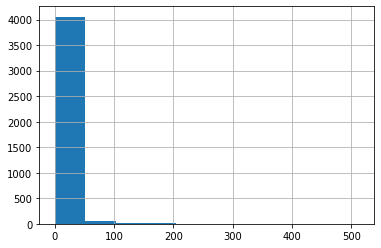

In [ ]:
products_summarized['total'].where(products_summarized['total'] > -1).dropna().hist()

In [ ]:
def clusterizer(x):
  if x == 0:
    cat = 'zero'
  elif x <= 6:
    cat = 'almost_zero'
  elif x <= 24:
    cat = 'low'
  elif x <= 48:
    cat = 'moderate'
  else:
    cat = 'high'
  return cat

In [ ]:
rotacion = products_summarized['total'].map(lambda x: clusterizer(x)) 

In [ ]:
rotacion.value_counts()

almost_zero    1770
zero           1621
low             544
moderate        116
high             91
Name: total, dtype: int64

In [ ]:
1770/91, 1621/91, 544/91, 116,91 

(19.45054945054945, 17.813186813186814, 5.978021978021978, 116, 91)

In [ ]:
indexes_zero = rotacion.index[rotacion == 'zero']
indexes_almost_zero = rotacion.index[rotacion == 'almost_zero']
indexes_low = rotacion.index[rotacion == 'low']
indexes_moderate = rotacion.index[rotacion == 'moderate']
indexes_high = rotacion.index[rotacion == 'high']

In [ ]:
sample_zero = np.random.choice(indexes_zero, size=116, replace=False)
sample_almost_zero = np.random.choice(indexes_almost_zero, size=116, replace=False)
sample_low = np.random.choice(indexes_low, size=116, replace=False)
sample_moderate = indexes_moderate
sample_high = indexes_high

In [ ]:
sample_indexes_list = [sample_zero, sample_almost_zero, sample_low, sample_moderate, sample_high]

In [ ]:
sample_df = pd.DataFrame()
for sample in sample_indexes_list:
  sample_df = sample_df.append(products.iloc[sample,:])

In [ ]:
sample_df = sample_df.sort_index()
sample_df.head()

,Descripcion,2018 - April - 30,2018 - May - 31,2018 - June - 30,2018 - July - 31,2018 - August - 31,2018 - September - 30,2018 - October - 31,2018 - November - 30,2018 - December - 31,2019 - January - 31,2019 - February - 28,2019 - March - 31,2019 - April - 30,2019 - May - 31,2019 - June - 30,2019 - July - 31,2019 - August - 31,2019 - September - 30,2019 - October - 31,2019 - November - 30,2019 - December - 31,2020 - January - 31,2020 - February - 28,2020 - March - 31
12,"[(correa alternador, sprint)]",0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,1.0,1.0,2.0,3.0,0.0,0.0
15,"[(correa alternador, damas labo tico), (correa...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16,"[(correa alternador, tico r46)]",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
20,"[(correa alternador, lanos)]",0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36,"[(correa alternador, 323 swift), (correa alter...",0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
rotacion_sample = sample_df.iloc[:,1:].apply(lambda x: clusterizer(sum(x)),axis=1) 

In [ ]:
rotacion_sample.value_counts()

almost_zero    116
zero           116
moderate       116
low            116
high            91
dtype: int64

In [ ]:
#loops = 1+ n - xlen - y_len
loops = 1 + 24 -12 - 2
loops

11

In [ ]:
def datasets_train_test_split(df, x_len=12, y_len=1, test_size=0.15): #, s_len=12, test_loops=1):
  from sklearn.model_selection import train_test_split
  D = df.values
  rows,periods = D.shape
  
  #formato de los datos 
  loops = periods + 1 - x_len - y_len
  train = []
  for col in range(loops):
      train.append(D[:,col:col+x_len+y_len])
  train = np.vstack(train)
  X_train, Y_train = np.split(train,[-y_len],axis=1)
  
  #Creación de los dataset de prueba y entrenamiento
  #Usando la aleatoreidad  
  X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=test_size, random_state=42)
  
  
  #Dando formato requerido por scikit-learn
  if y_len == 1:
      Y_train = Y_train.ravel()
      Y_test = Y_test.ravel()
  
  return X_train, Y_train, X_test, Y_test

# VII Modeling

### KPI_Function

In [ ]:
def kpi_ML(Y_train, Y_train_pred, Y_test, Y_test_pred, name=''):
    
    df = pd.DataFrame(columns=['MAE','RMSE','Bias'],index=['Train', 'Test'])
    df.index.name=name
    
    df.loc['Train','MAE'] = 100*np.mean(abs(Y_train - Y_train_pred))/np.mean(Y_train)
    df.loc['Train','RMSE'] = 100*np.sqrt( np.mean((Y_train - Y_train_pred)**2) ) /np.mean(Y_train)
    df.loc['Train','Bias'] = 100*np.mean(Y_train - Y_train_pred)/np.mean(Y_train)
    df.loc['Test','MAE'] = 100*np.mean(abs(Y_test - Y_test_pred))/np.mean(Y_test)
    df.loc['Test','RMSE'] = 100*np.sqrt( np.mean((Y_test - Y_test_pred)**2) ) /np.mean(Y_test)
    df.loc['Test','Bias'] = 100*np.mean(Y_test - Y_test_pred)/np.mean(Y_test)
    df = df.astype(float).round(1)
    print(df)   

## Árbol de regresión + Cross Validation + Optimización con RandomizedSearch y GridSearch grill

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.tree import DecisionTreeRegressor

In [ ]:
X_train, y_train, X_test, y_test = datasets_train_test_split(sample_df.iloc[:,1:], x_len=12, y_len=1)

In [ ]:
max_depth = list(range(5,11)) + [None]
min_samples_split = range(5,20)
min_samples_leaf = range(2,20)
param_dist = {
    'max_depth' : max_depth,
    'min_samples_split' : min_samples_split,
    'min_samples_leaf' : min_samples_leaf
}

In [ ]:
tree_0 = DecisionTreeRegressor()
tree_cv = RandomizedSearchCV(tree_0, param_dist, n_jobs=-1, cv=10, verbose=1, n_iter=100, scoring='neg_mean_absolute_error')
tree_cv.fit(X_train,y_train)
print(f'Best parameters are: {tree_cv.best_params_}, with a score of: {tree_cv.best_score_}')

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Best parameters are: {'min_samples_split': 8, 'min_samples_leaf': 18, 'max_depth': None}, with a score of: -1.1501383165527863


In [ ]:
# Se pueden hacer predicciones y obtener la medida de los KPI que nos interesan
#Validación del módelo en el Training Set
#RMSE , #MAE
np.sqrt(np.mean((y_train-tree_cv.predict(X_train))**2))/np.mean(y_train), np.mean(abs(y_train-tree_cv.predict(X_train)))/np.mean(y_train)

(1.8662814982306577, 0.8451905767278374)

In [ ]:
#Validación del módelo en el Test Set
RMSE = np.sqrt(np.mean((y_test-tree_cv.predict(X_test))**2))/np.mean(y_test)
MAE = np.mean(abs(y_test-tree_cv.predict(X_test)))/np.mean(y_test)
RMSE, MAE

(2.1990242902989072, 0.991786945224581)

In [ ]:
kpi_ML(y_train,tree_cv.predict(X_train),y_test,tree_cv.predict(X_test),name='DecissionTreeRegressor+RandomizedSearchCV')

                                            MAE   RMSE  Bias
DecissionTreeRegressor+RandomizedSearchCV                   
Train                                      84.5  186.6   0.0
Test                                       99.2  219.9   0.4


### GridSearch

In [ ]:
tree_0 = DecisionTreeRegressor()
tree_cv = GridSearchCV(tree_0, param_dist, n_jobs=-1, cv=10, verbose=1, scoring='neg_mean_absolute_error')
tree_cv.fit(X_train,y_train)
print(f'Best parameters are: {tree_cv.best_params_}, with a score of: {tree_cv.best_score_}')

Fitting 10 folds for each of 1890 candidates, totalling 18900 fits
Best parameters are: {'max_depth': None, 'min_samples_leaf': 18, 'min_samples_split': 16}, with a score of: -1.149905929218864


In [ ]:
kpi_ML(y_train,tree_cv.predict(X_train),y_test,tree_cv.predict(X_test),name='DecissionTreeRegressor+GridSearchCV')

                                      MAE   RMSE  Bias
DecissionTreeRegressor+GridSearchCV                   
Train                                84.5  186.6   0.0
Test                                 99.2  219.9   0.4


In [ ]:
# Creación del módelo suelto en base a GridSearchCV
regtree = DecisionTreeRegressor(**tree_cv.best_params_)
regtree.fit(X_train,y_train)

DecisionTreeRegressor(min_samples_leaf=13, min_samples_split=12)

In [ ]:
kpi_ML(y_train,regtree.predict(X_train),y_test,regtree.predict(X_test),name='DecissionTreeRegressor+GridSearchCV')

                                      MAE   RMSE  Bias
DecissionTreeRegressor+GridSearchCV                   
Train                                82.7  182.3  -0.0
Test                                 98.4  216.4  -2.3


<BarContainer object of 12 artists>

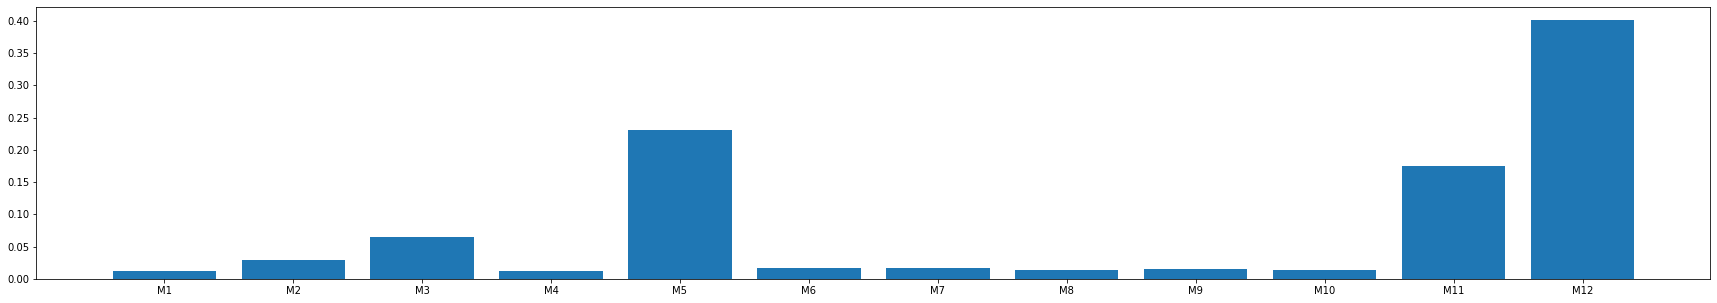

In [ ]:
# Al tener el módelo suelto, se puede observar el feature importance
plt.figure(figsize=(30,5))
plt.bar([f'M{m+1}' for m in range(X_train.shape[1])],regtree.feature_importances_)

## Bosque aleatorio

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
X_train, y_train, X_test, y_test = datasets_train_test_split(sample_df.iloc[:,1:], x_len=12, y_len=1)

In [ ]:
max_depth = list(range(5,11)) + [None]
min_samples_split = range(5,20)
min_samples_leaf = range(2,15)
max_features = range(3,8)
bootstrap = [True] #We force bootstrap
max_samples = [.7,.8,.9,.95,1]
param_dist = {'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf,
              'max_features': max_features,
              'bootstrap': bootstrap,
              'max_samples': max_samples}

In [ ]:
forest = RandomForestRegressor(n_jobs=-1, n_estimators=50)
forest_cv = RandomizedSearchCV(forest, param_dist, cv=10, n_jobs=-1, verbose=2, n_iter=400, scoring='neg_mean_absolute_error')
forest_cv.fit(X_train,y_train)

Fitting 10 folds for each of 400 candidates, totalling 4000 fits


RandomizedSearchCV(cv=10,
                   estimator=RandomForestRegressor(n_estimators=50, n_jobs=-1),
                   n_iter=400, n_jobs=-1,
                   param_distributions={'bootstrap': [True],
                                        'max_depth': [5, 6, 7, 8, 9, 10, None],
                                        'max_features': range(3, 8),
                                        'max_samples': [0.7, 0.8, 0.9, 0.95, 1],
                                        'min_samples_leaf': range(2, 15),
                                        'min_samples_split': range(5, 20)},
                   scoring='neg_mean_absolute_error', verbose=2)

In [ ]:
forest_cv.best_params_

{'bootstrap': True,
 'max_depth': None,
 'max_features': 7,
 'max_samples': 0.9,
 'min_samples_leaf': 9,
 'min_samples_split': 17}

In [ ]:
kpi_ML(y_train,tree_cv.predict(X_train),y_test,tree_cv.predict(X_test),name='DecissionTreeRegressor+GridSearchCV')

                                      MAE   RMSE  Bias
DecissionTreeRegressor+GridSearchCV                   
Train                                84.5  186.6   0.0
Test                                 99.2  219.9   0.4


In [ ]:
forest_best_params = RandomForestRegressor(n_estimators=500, **forest_cv.best_params_).fit(X_train,y_train)

In [ ]:
kpi_ML(y_train,forest_best_params.predict(X_train),y_test,forest_best_params.predict(X_test),name='DecissionTreeRegressor+GridSearchCV')

                                      MAE   RMSE  Bias
DecissionTreeRegressor+GridSearchCV                   
Train                                79.9  174.3   0.0
Test                                 93.5  197.1  -3.4


In [ ]:
n_estimators_list = [400,450,500,550,600,650,700,750,900]
rmse_train_list = []
rmse_test_list = []
mae_train_list = []
mae_test_list = []

X_train, y_train, X_test, y_test = datasets_train_test_split(sample_df.iloc[:,1:], x_len=12, y_len=1)
for n  in n_estimators_list:
  
  forest_best_params = RandomForestRegressor(n_estimators=n, **forest_cv.best_params_).fit(X_train,y_train)

  rmse_value_train = np.sqrt(np.mean((y_train-forest_best_params.predict(X_train))**2))/np.mean(y_train)
  rmse_value_test = np.sqrt(np.mean((y_test-forest_best_params.predict(X_test))**2))/np.mean(y_test)

  mae_value_train = np.mean(abs(y_train-forest_best_params.predict(X_train)))/np.mean(y_train)
  mae_value_test = np.mean(abs(y_test-forest_best_params.predict(X_test)))/np.mean(y_test)

  rmse_train_list.append(rmse_value_train)
  rmse_test_list.append(rmse_value_test)
  mae_train_list.append(mae_value_train)
  mae_test_list.append(mae_value_test)

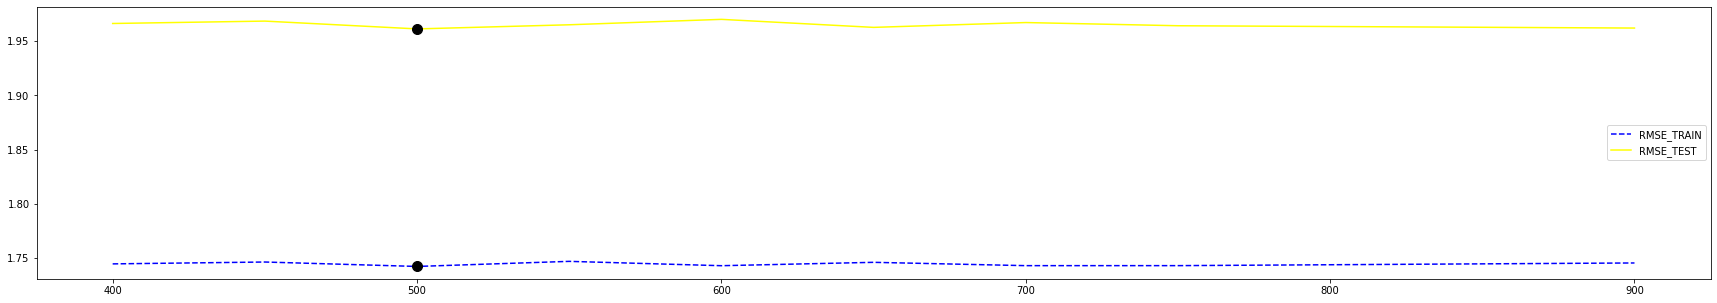

In [ ]:
plt.figure(figsize=(30,5))
plt.plot(n_estimators_list,rmse_train_list, linestyle='--', label='RMSE_TRAIN', color='blue' )
plt.plot(n_estimators_list,rmse_test_list, linestyle='-', label='RMSE_TEST', color='yellow' )

rmse_train_min = min(rmse_train_list)
rmse_train_min_index = rmse_train_list.index(rmse_train_min)
rmse_test_min = min(rmse_test_list)
rmse_test_min_index = rmse_test_list.index(rmse_test_min)

plt.plot(n_estimators_list[rmse_train_min_index], rmse_train_min, marker='o', color='black',markersize=10)
plt.plot(n_estimators_list[rmse_test_min_index], rmse_test_min, marker='o', color='black',markersize=10)

plt.legend()
plt.show()

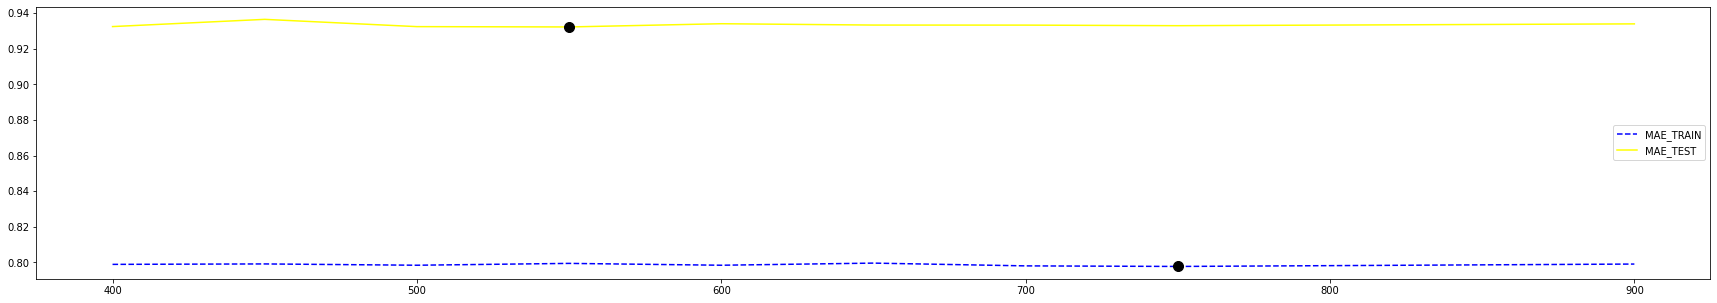

In [ ]:
plt.figure(figsize=(30,5))
plt.plot(n_estimators_list,mae_train_list, linestyle='--', label='MAE_TRAIN', color='blue' )
plt.plot(n_estimators_list,mae_test_list, linestyle='-', label='MAE_TEST', color='yellow' )

mae_train_min = min(mae_train_list)
mae_train_min_index = mae_train_list.index(mae_train_min)
mae_test_min = min(mae_test_list)
mae_test_min_index = mae_test_list.index(mae_test_min)

plt.plot(n_estimators_list[mae_train_min_index], mae_train_min, marker='o', color='black',markersize=10)
plt.plot(n_estimators_list[mae_test_min_index], mae_test_min, marker='o', color='black',markersize=10)
plt.legend()
plt.show()

## XGBoost

In [ ]:
from xgboost.sklearn import XGBRegressor

In [ ]:
X_train, y_train, X_test, y_test = datasets_train_test_split(sample_df.iloc[:,1:], x_len=12, y_len=1)

### Optimización de parámetros (RandomizedSearch + CV)

In [ ]:
params = {
    'max_depth' : [5,6,7,8,10,11],
    'learning_rate' : [0.005,0.01,0.025,0.05,0.1,0.15],
    'colsample_bynode' : [0.5,0.6,0.7,0.8,0.9,1.0], #max_features
    'colsample_bylevel' : [0.8,0.9,1.0],
    'colsample_bytree' : [0.6,0.7,0.8,0.9,1.0],
    'subsample' : [0.1,0.2,0.3,0.4,0.5,0.6,0.7],#max_samples
    'min_child_weight' : [5,10,15,20,25], #min_sample_leaf
    'reg_alpha' : [1,5,10,20,50],
    'reg_lambda' : [0.01,0.05,0.1,0.5,1],
    'n_estimators' : [400]
}

In [ ]:
fit_params = {
    'eval_metric' : 'mae',
    'verbose' : False
}

In [ ]:
XGB = XGBRegressor(n_jobs=1)
XGB_cv = RandomizedSearchCV(XGB, params, cv=5, n_jobs=-1, verbose=1, n_iter=100, scoring='neg_mean_absolute_error')
XGB_cv.fit(X_train,y_train,**fit_params)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[20:30:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=5, estimator=XGBRegressor(), n_iter=100, n_jobs=-1,
                   param_distributions={'colsample_bylevel': [0.8, 0.9, 1.0],
                                        'colsample_bynode': [0.5, 0.6, 0.7, 0.8,
                                                             0.9, 1.0],
                                        'colsample_bytree': [0.6, 0.7, 0.8, 0.9,
                                                             1.0],
                                        'learning_rate': [0.005, 0.01, 0.025,
                                                          0.05, 0.1, 0.15],
                                        'max_depth': [5, 6, 7, 8, 10, 11],
                                        'min_child_weight': [5, 10, 15, 20, 25],
                                        'n_estimators': [400],
                                        'reg_alpha': [1, 5, 10, 20, 50],
                                        'reg_lambda': [0.01, 0.05, 0.1, 0.5, 1],
                    

In [ ]:
XGB_cv.best_params_

{'colsample_bylevel': 0.9,
 'colsample_bynode': 0.9,
 'colsample_bytree': 0.8,
 'learning_rate': 0.01,
 'max_depth': 6,
 'min_child_weight': 5,
 'n_estimators': 400,
 'reg_alpha': 50,
 'reg_lambda': 1,
 'subsample': 0.5}

In [ ]:
y_train_pred = XGB_cv.predict(X_train)
y_test_pred = XGB_cv.predict(X_test)
kpi_ML(y_train, y_train_pred.round(), y_test, y_test_pred.round(), name='XGBoost')

          MAE   RMSE  Bias
XGBoost                   
Train    80.5  181.5  10.7
Test     86.1  196.2   9.6


### XGB best parameters + optimización del número de estimadores

In [ ]:
params = XGB_cv.best_params_
del params['n_estimators']
params

{'colsample_bylevel': 0.9,
 'colsample_bynode': 0.9,
 'colsample_bytree': 0.8,
 'learning_rate': 0.01,
 'max_depth': 6,
 'min_child_weight': 5,
 'reg_alpha': 50,
 'reg_lambda': 1,
 'subsample': 0.5}

In [ ]:
n_estimators_list = [100,200,400,450,500,550,600,650,700,750,900,1000]
rmse_train_list = []
rmse_test_list = []
mae_train_list = []
mae_test_list = []

X_train, y_train, X_test, y_test = datasets_train_test_split(sample_df.iloc[:,1:], x_len=12, y_len=1)
for n  in n_estimators_list:
  
  XGB_bp = XGBRegressor(n_estimators=n, **XGB_cv.best_params_).fit(X_train,y_train)

  rmse_value_train = np.sqrt(np.mean((y_train-XGB_bp.predict(X_train))**2))/np.mean(y_train)
  rmse_value_test = np.sqrt(np.mean((y_test-XGB_bp.predict(X_test))**2))/np.mean(y_test)

  mae_value_train = np.mean(abs(y_train-XGB_bp.predict(X_train)))/np.mean(y_train)
  mae_value_test = np.mean(abs(y_test-XGB_bp.predict(X_test)))/np.mean(y_test)

  rmse_train_list.append(rmse_value_train)
  rmse_test_list.append(rmse_value_test)
  mae_train_list.append(mae_value_train)
  mae_test_list.append(mae_value_test)

[20:30:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:30:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:30:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:30:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:30:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:31:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:31:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:31:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

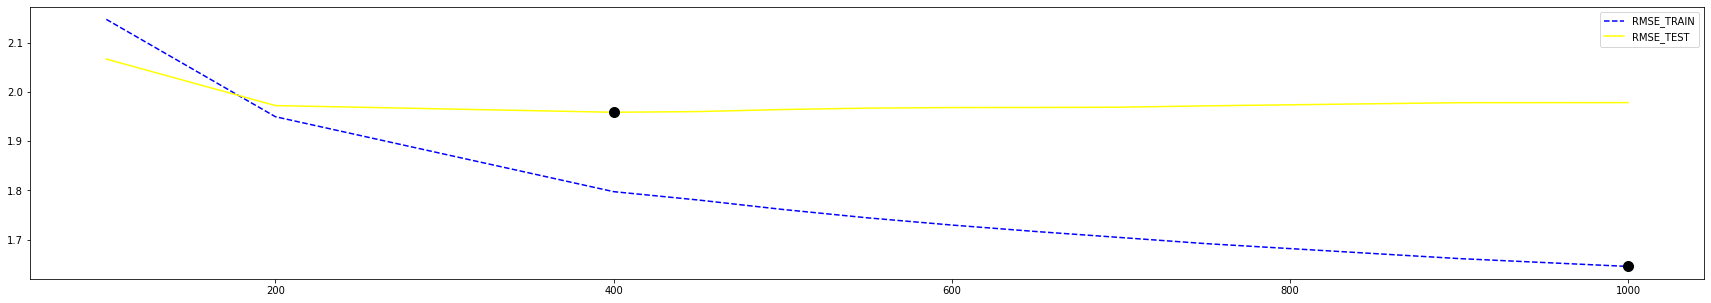

In [ ]:
plt.figure(figsize=(30,5))
plt.plot(n_estimators_list,rmse_train_list, linestyle='--', label='RMSE_TRAIN', color='blue' )
plt.plot(n_estimators_list,rmse_test_list, linestyle='-', label='RMSE_TEST', color='yellow' )

rmse_train_min = min(rmse_train_list)
rmse_train_min_index = rmse_train_list.index(rmse_train_min)
rmse_test_min = min(rmse_test_list)
rmse_test_min_index = rmse_test_list.index(rmse_test_min)

plt.plot(n_estimators_list[rmse_train_min_index], rmse_train_min, marker='o', color='black',markersize=10)
plt.plot(n_estimators_list[rmse_test_min_index], rmse_test_min, marker='o', color='black',markersize=10)

plt.legend()
plt.show()

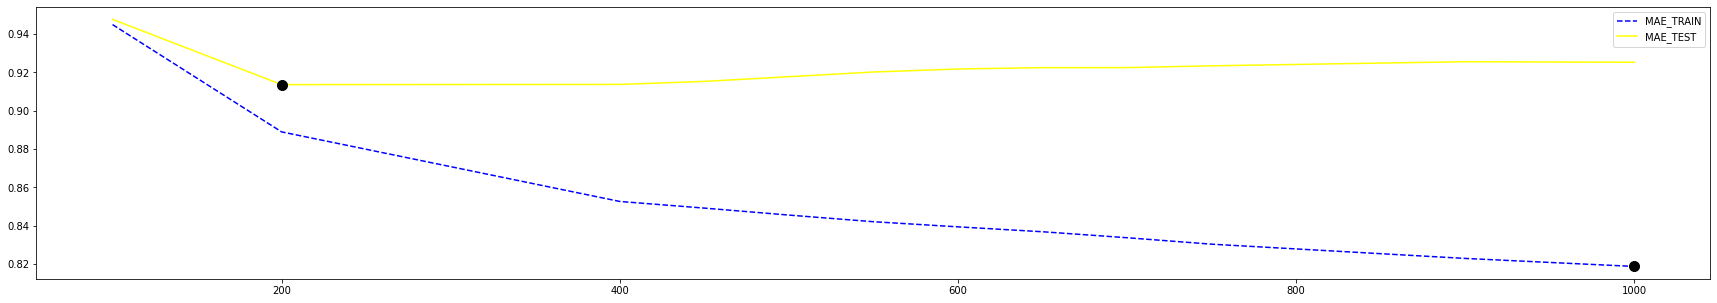

In [ ]:
plt.figure(figsize=(30,5))
plt.plot(n_estimators_list,mae_train_list, linestyle='--', label='MAE_TRAIN', color='blue' )
plt.plot(n_estimators_list,mae_test_list, linestyle='-', label='MAE_TEST', color='yellow' )

mae_train_min = min(mae_train_list)
mae_train_min_index = mae_train_list.index(mae_train_min)
mae_test_min = min(mae_test_list)
mae_test_min_index = mae_test_list.index(mae_test_min)

plt.plot(n_estimators_list[mae_train_min_index], mae_train_min, marker='o', color='black',markersize=10)
plt.plot(n_estimators_list[mae_test_min_index], mae_test_min, marker='o', color='black',markersize=10)
plt.legend()
plt.show()

### XGB Best parameters

In [ ]:
XGB_bp = XGBRegressor(n_estimators=400 ,**XGB_cv.best_params_)
XGB_bp.fit(X_train,y_train)

[20:31:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(colsample_bylevel=0.9, colsample_bynode=0.9, colsample_bytree=0.8,
             learning_rate=0.01, max_depth=6, min_child_weight=5,
             n_estimators=400, reg_alpha=50, subsample=0.5)

In [ ]:
y_train_pred = XGB_bp.predict(X_train)
y_test_pred = XGB_bp.predict(X_test)
kpi_ML(y_train, y_train_pred.round(), y_test, y_test_pred.round(), name='XGBoost')

          MAE   RMSE  Bias
XGBoost                   
Train    80.5  181.5  10.7
Test     86.1  196.2   9.6


<BarContainer object of 12 artists>

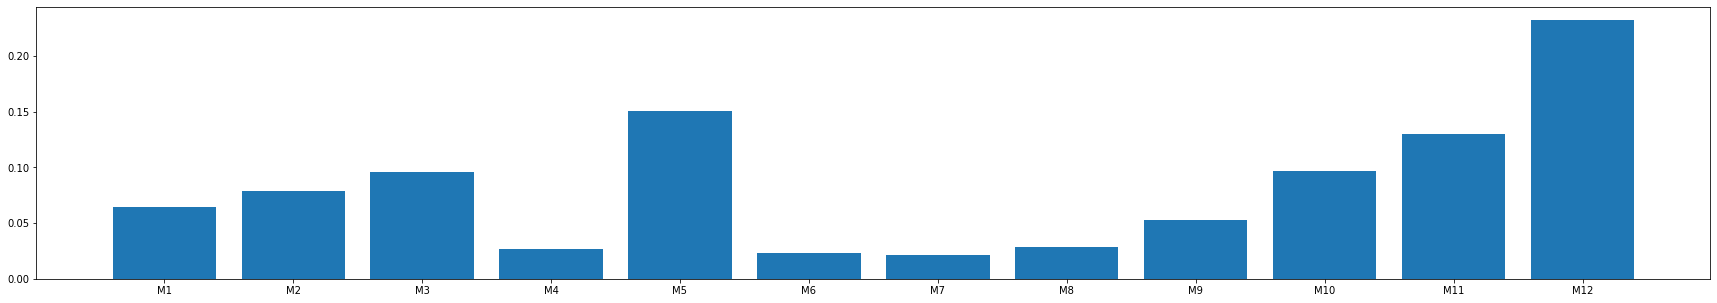

In [ ]:
# Al tener el módelo suelto, se puede observar el feature importance
plt.figure(figsize=(30,5))
plt.bar([f'M{m+1}' for m in range(X_train.shape[1])],XGB_bp.feature_importances_)

In [ ]:
from collections import Counter

<BarContainer object of 23 artists>

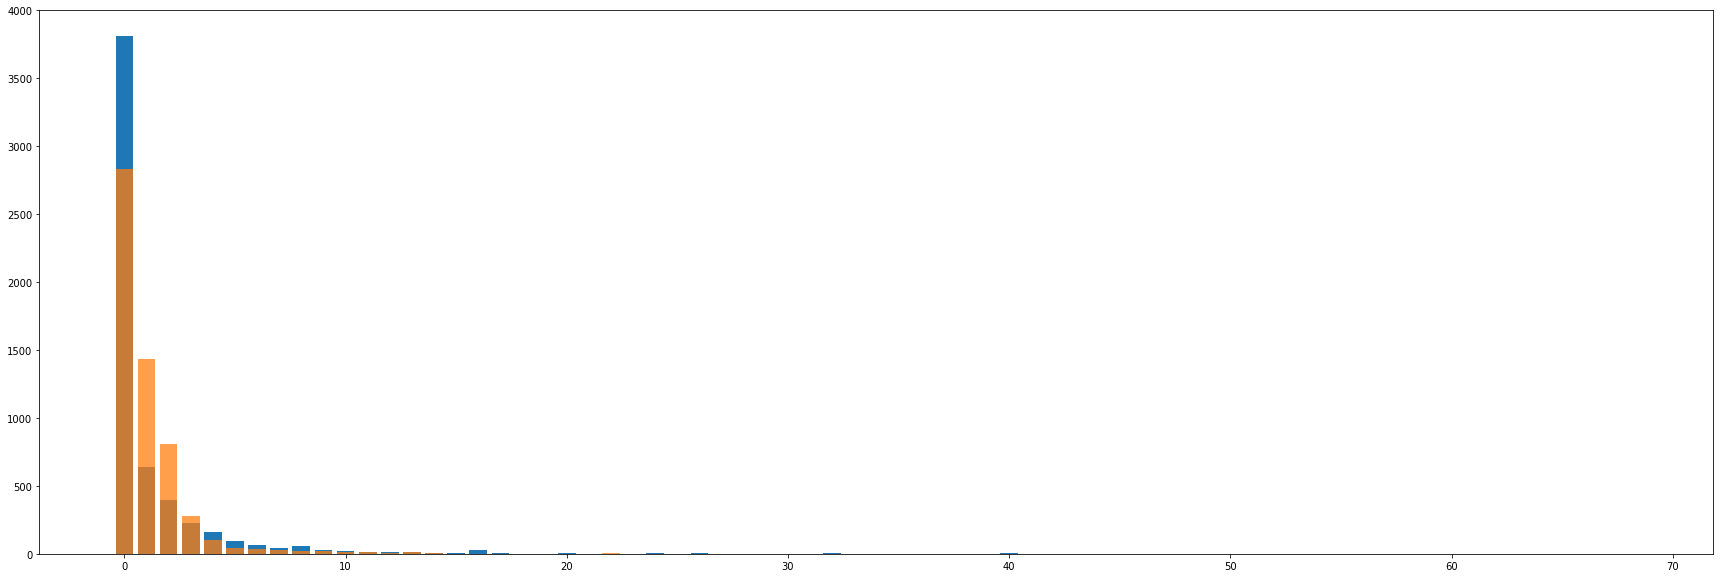

In [ ]:
plt.figure(figsize=(30,10))
plt.bar(Counter(y_train).keys(),Counter(y_train).values())
plt.bar(Counter(y_train_pred.round()).keys(), Counter(y_train_pred.round()).values(), alpha=0.75)

### XGB diferentes longitudes del dataset

In [ ]:
n_months = range(6,sample_df.shape[1]-1,2)
list(n_months)

[6, 8, 10, 12, 14, 16, 18, 20, 22]

In [ ]:
rmse_train_list = []
rmse_test_list = []
mae_train_list = []
mae_test_list = []

for x_len in n_months: # We loop through the different x_len
    X_train, y_train, X_test, y_test = datasets_train_test_split(sample_df.iloc[:,1:], x_len=x_len, y_len=1)

    
    fit_params = {
        'eval_metric' : 'mae',
        'verbose' : False
    }
    
    
    XGB_bp.fit(X_train, y_train, **fit_params)

    rmse_value_train = np.sqrt(np.mean((y_train-XGB_bp.predict(X_train))**2))/np.mean(y_train)
    rmse_value_test = np.sqrt(np.mean((y_test-XGB_bp.predict(X_test))**2))/np.mean(y_test)

    mae_value_train = np.mean(abs(y_train-XGB_bp.predict(X_train)))/np.mean(y_train)
    mae_value_test = np.mean(abs(y_test-XGB_bp.predict(X_test)))/np.mean(y_test)

    rmse_train_list.append(rmse_value_train)
    rmse_test_list.append(rmse_value_test)
    mae_train_list.append(mae_value_train)
    mae_test_list.append(mae_value_test)

[20:39:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:39:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:39:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:39:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:39:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:39:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:39:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:39:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

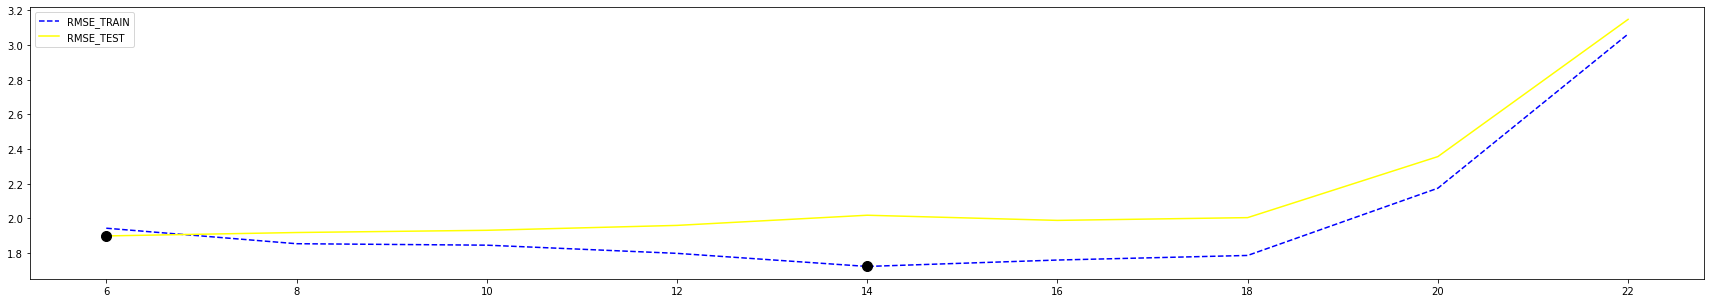

In [ ]:
plt.figure(figsize=(30,5))
plt.plot(n_months,rmse_train_list, linestyle='--', label='RMSE_TRAIN', color='blue' )
plt.plot(n_months,rmse_test_list, linestyle='-', label='RMSE_TEST', color='yellow' )

rmse_train_min = min(rmse_train_list)
rmse_train_min_index = rmse_train_list.index(rmse_train_min)
rmse_test_min = min(rmse_test_list)
rmse_test_min_index = rmse_test_list.index(rmse_test_min)

plt.plot(n_months[rmse_train_min_index], rmse_train_min, marker='o', color='black',markersize=10)
plt.plot(n_months[rmse_test_min_index], rmse_test_min, marker='o', color='black',markersize=10)

plt.legend()
plt.show()

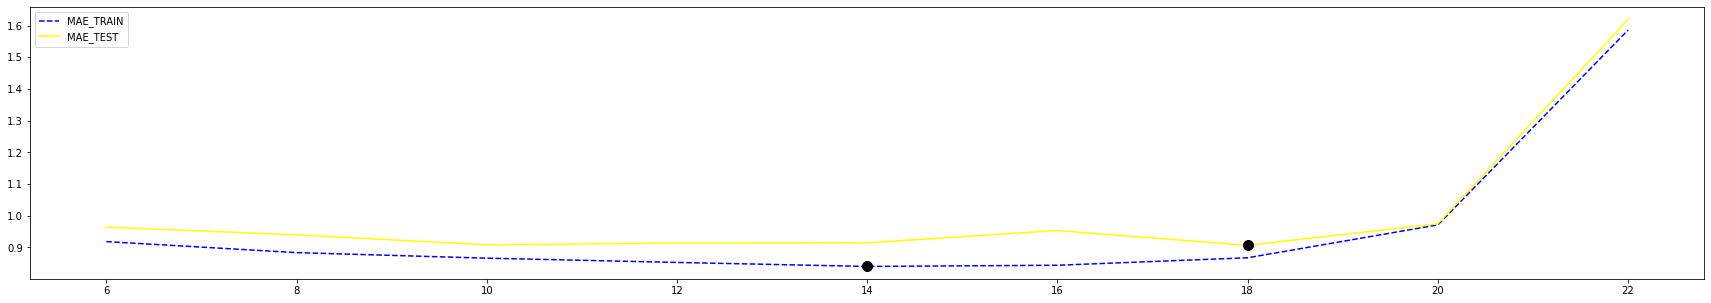

In [ ]:
plt.figure(figsize=(30,5))
plt.plot(n_months,mae_train_list, linestyle='--', label='MAE_TRAIN', color='blue' )
plt.plot(n_months,mae_test_list, linestyle='-', label='MAE_TEST', color='yellow' )

mae_train_min = min(mae_train_list)
mae_train_min_index = mae_train_list.index(mae_train_min)
mae_test_min = min(mae_test_list)
mae_test_min_index = mae_test_list.index(mae_test_min)

plt.plot(n_months[mae_train_min_index], mae_train_min, marker='o', color='black',markersize=10)
plt.plot(n_months[mae_test_min_index], mae_test_min, marker='o', color='black',markersize=10)
plt.legend()
plt.show()